In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import Sequential
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Input, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

import sys
sys.path.append(parent_dir)

# import balanceDataset as balance
#import modelTrainingAndPerformance as mtap

import shap

In [2]:
try:
    data = pd.read_csv('/Users/albertohernandez/Documents/projects/AI-Based-Fraud-Detection/data/01_credit_card/creditcard.csv')
except:
    data = pd.read_csv('/Users/albertohernandez/Documents/projects/AI-Based-Fraud-Detection/data/01_credit_card/creditcard.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
def show_graphs(df):
    fraud_counts = df['Class'].value_counts()

    # pie chart
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    ax1.pie(fraud_counts, labels=['Non-fraudulent', 'Fraudulent'], colors=['lightblue', 'red'], autopct='%1.1f%%')
    ax1.set_title('Transaction Class Distribution')

    # bar plot
    ax2.bar(['Non-fraudulent', 'Fraudulent'], fraud_counts.values, color=['lightblue', 'red'])
    ax2.set_xlabel('Transaction Class')
    ax2.set_ylabel('Number of Transactions')
    ax2.set_title('Credit Card Fraud Detection')
    for i in ax2.containers:
        ax2.bar_label(i,)

    plt.show()

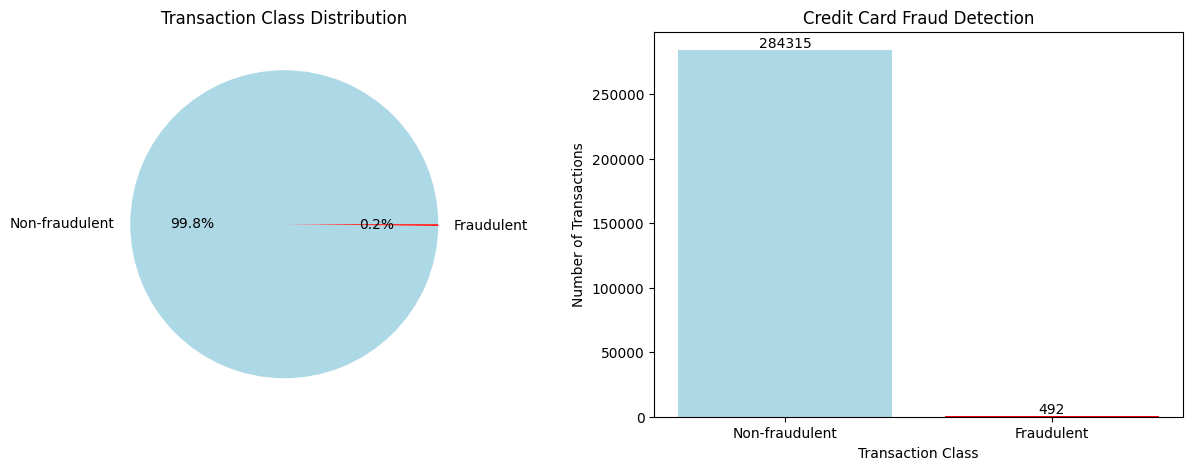

In [8]:
show_graphs(df)

In [9]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal transaction count = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Number of fraudulent transactions = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal transaction count = 284315 (% 99.82725143693798)
Number of fraudulent transactions = 492 (% 0.1727485630620034)


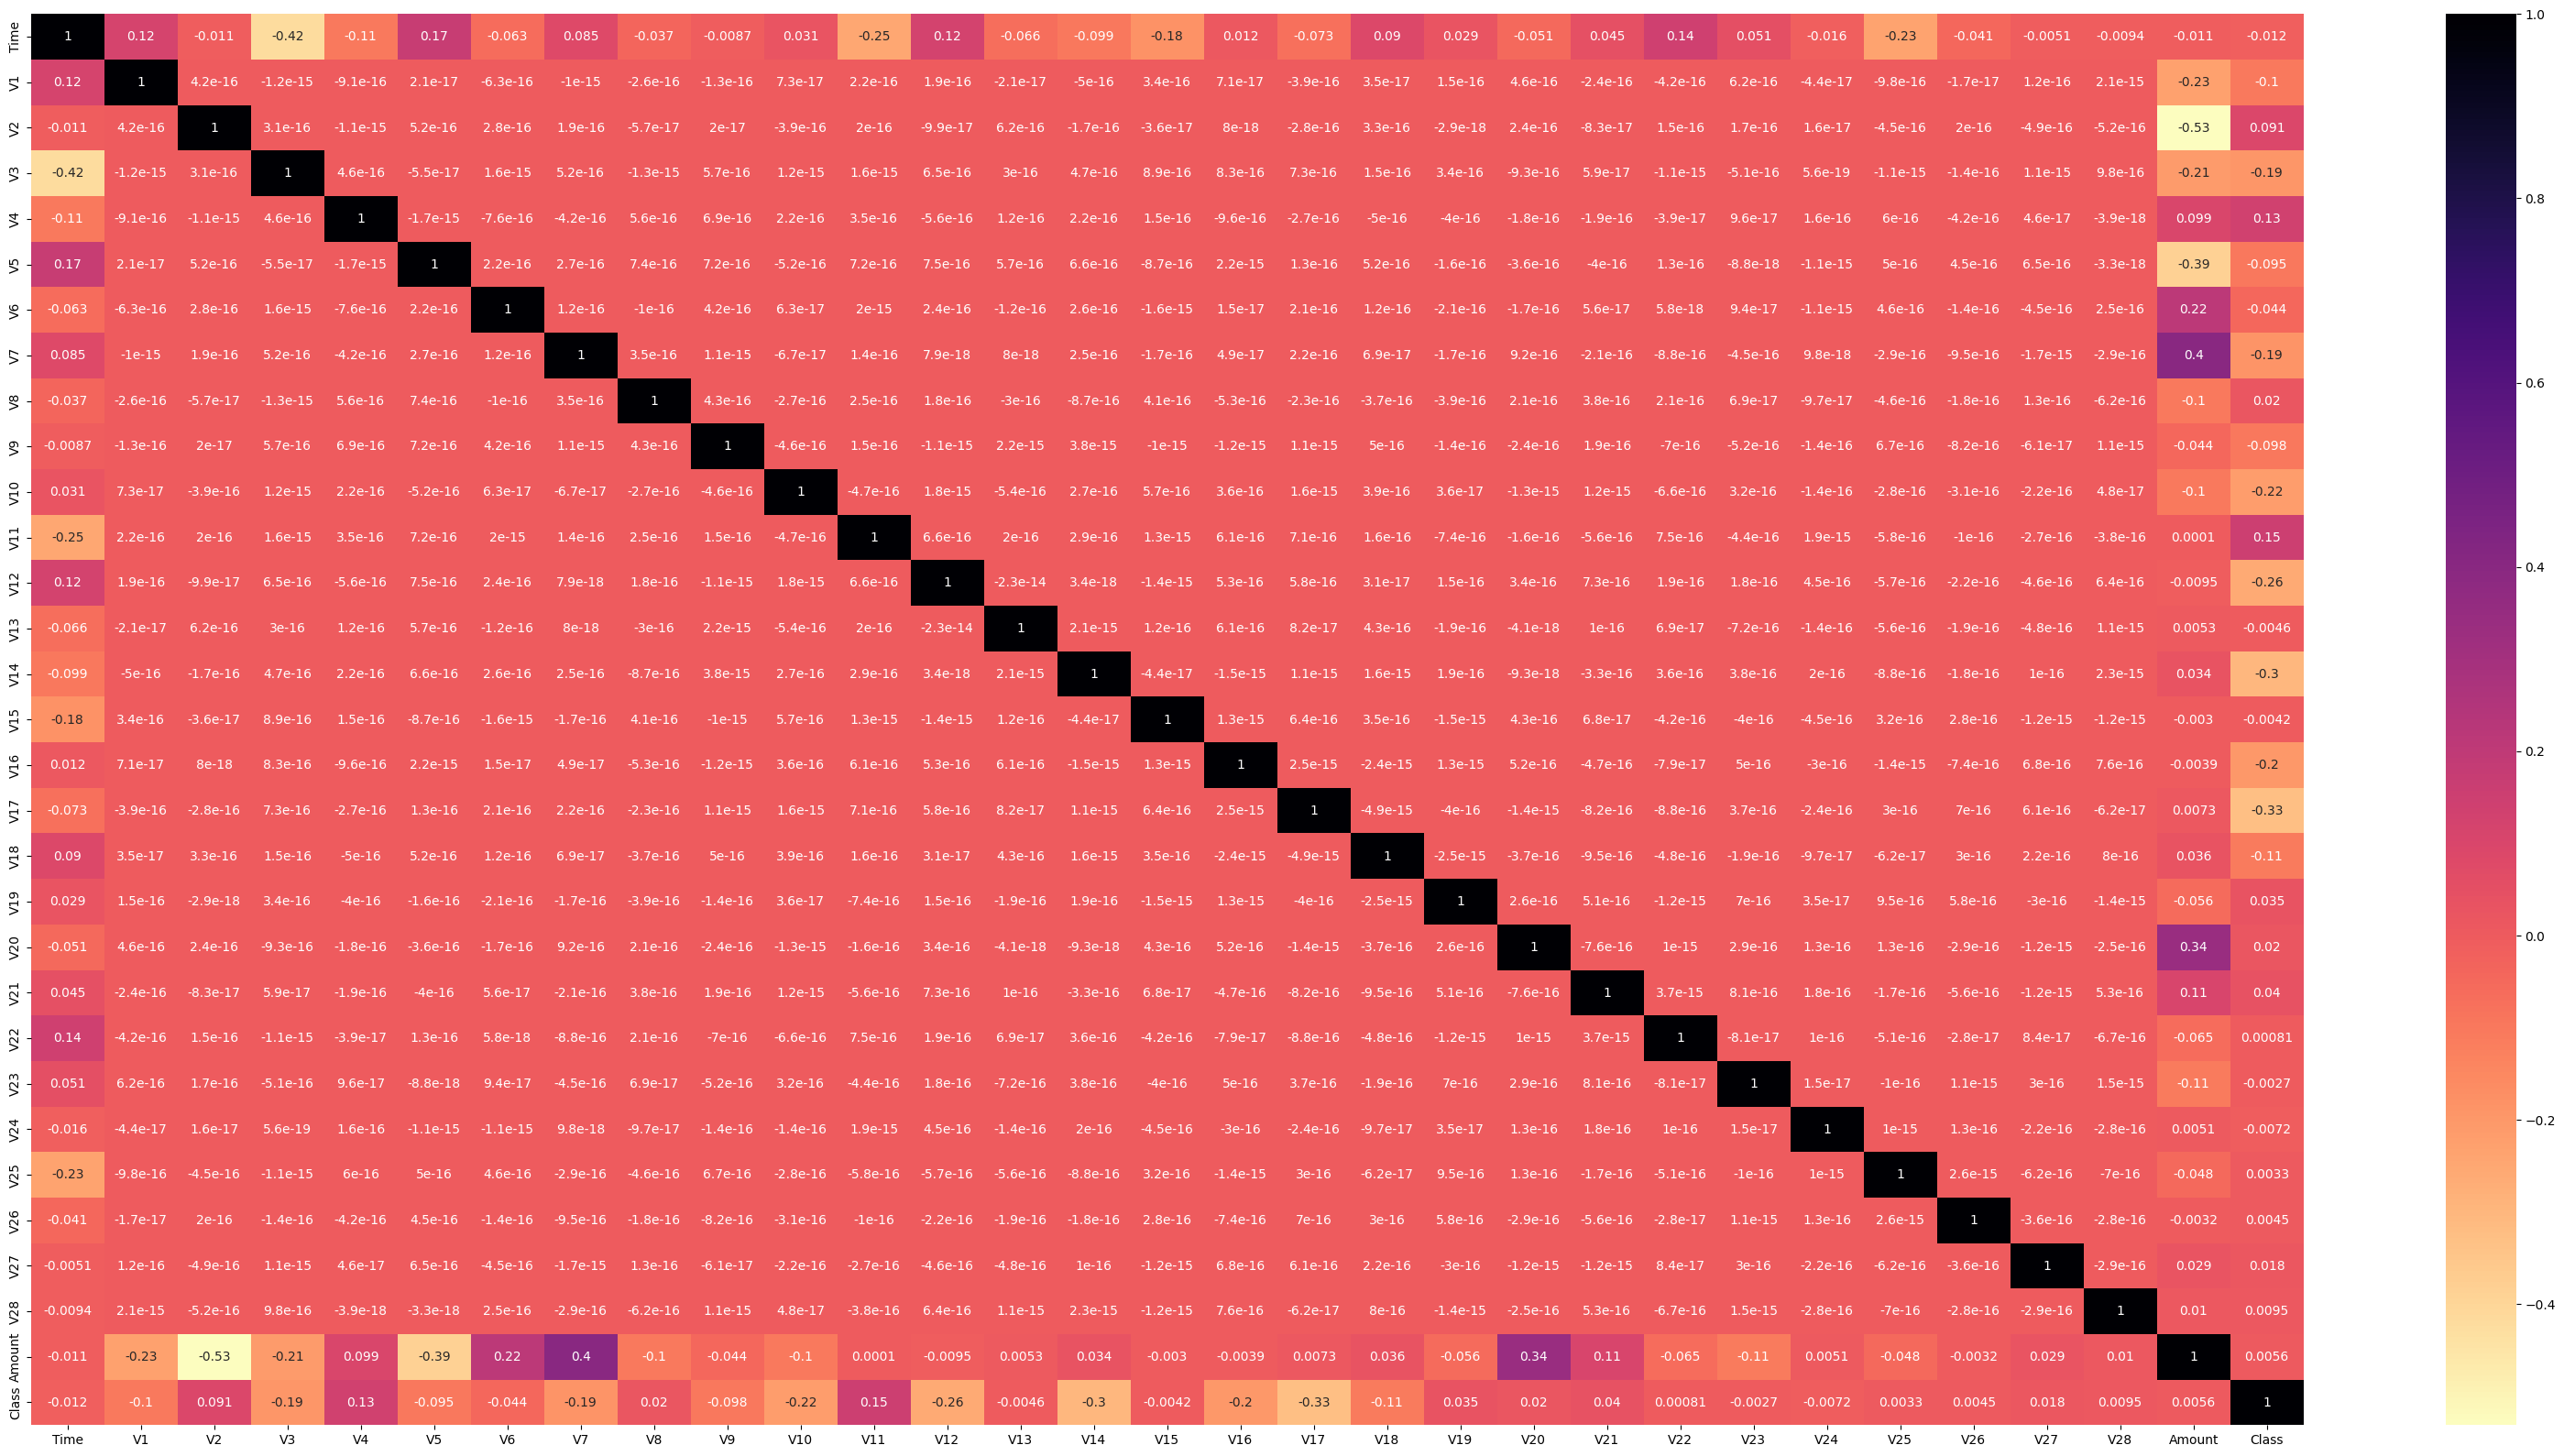

In [10]:
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

# Data Preprocessing

It is known that all features except the "Time" and "Amount" columns have been transformed using PCA.
Based on this information, it can be said that the features other than the specified columns have been scaled.
    * Because in order for features to undergo PCA transformation, they must be scaled.

In [11]:
df.drop_duplicates(inplace=True) #We removed duplicate records

In [12]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

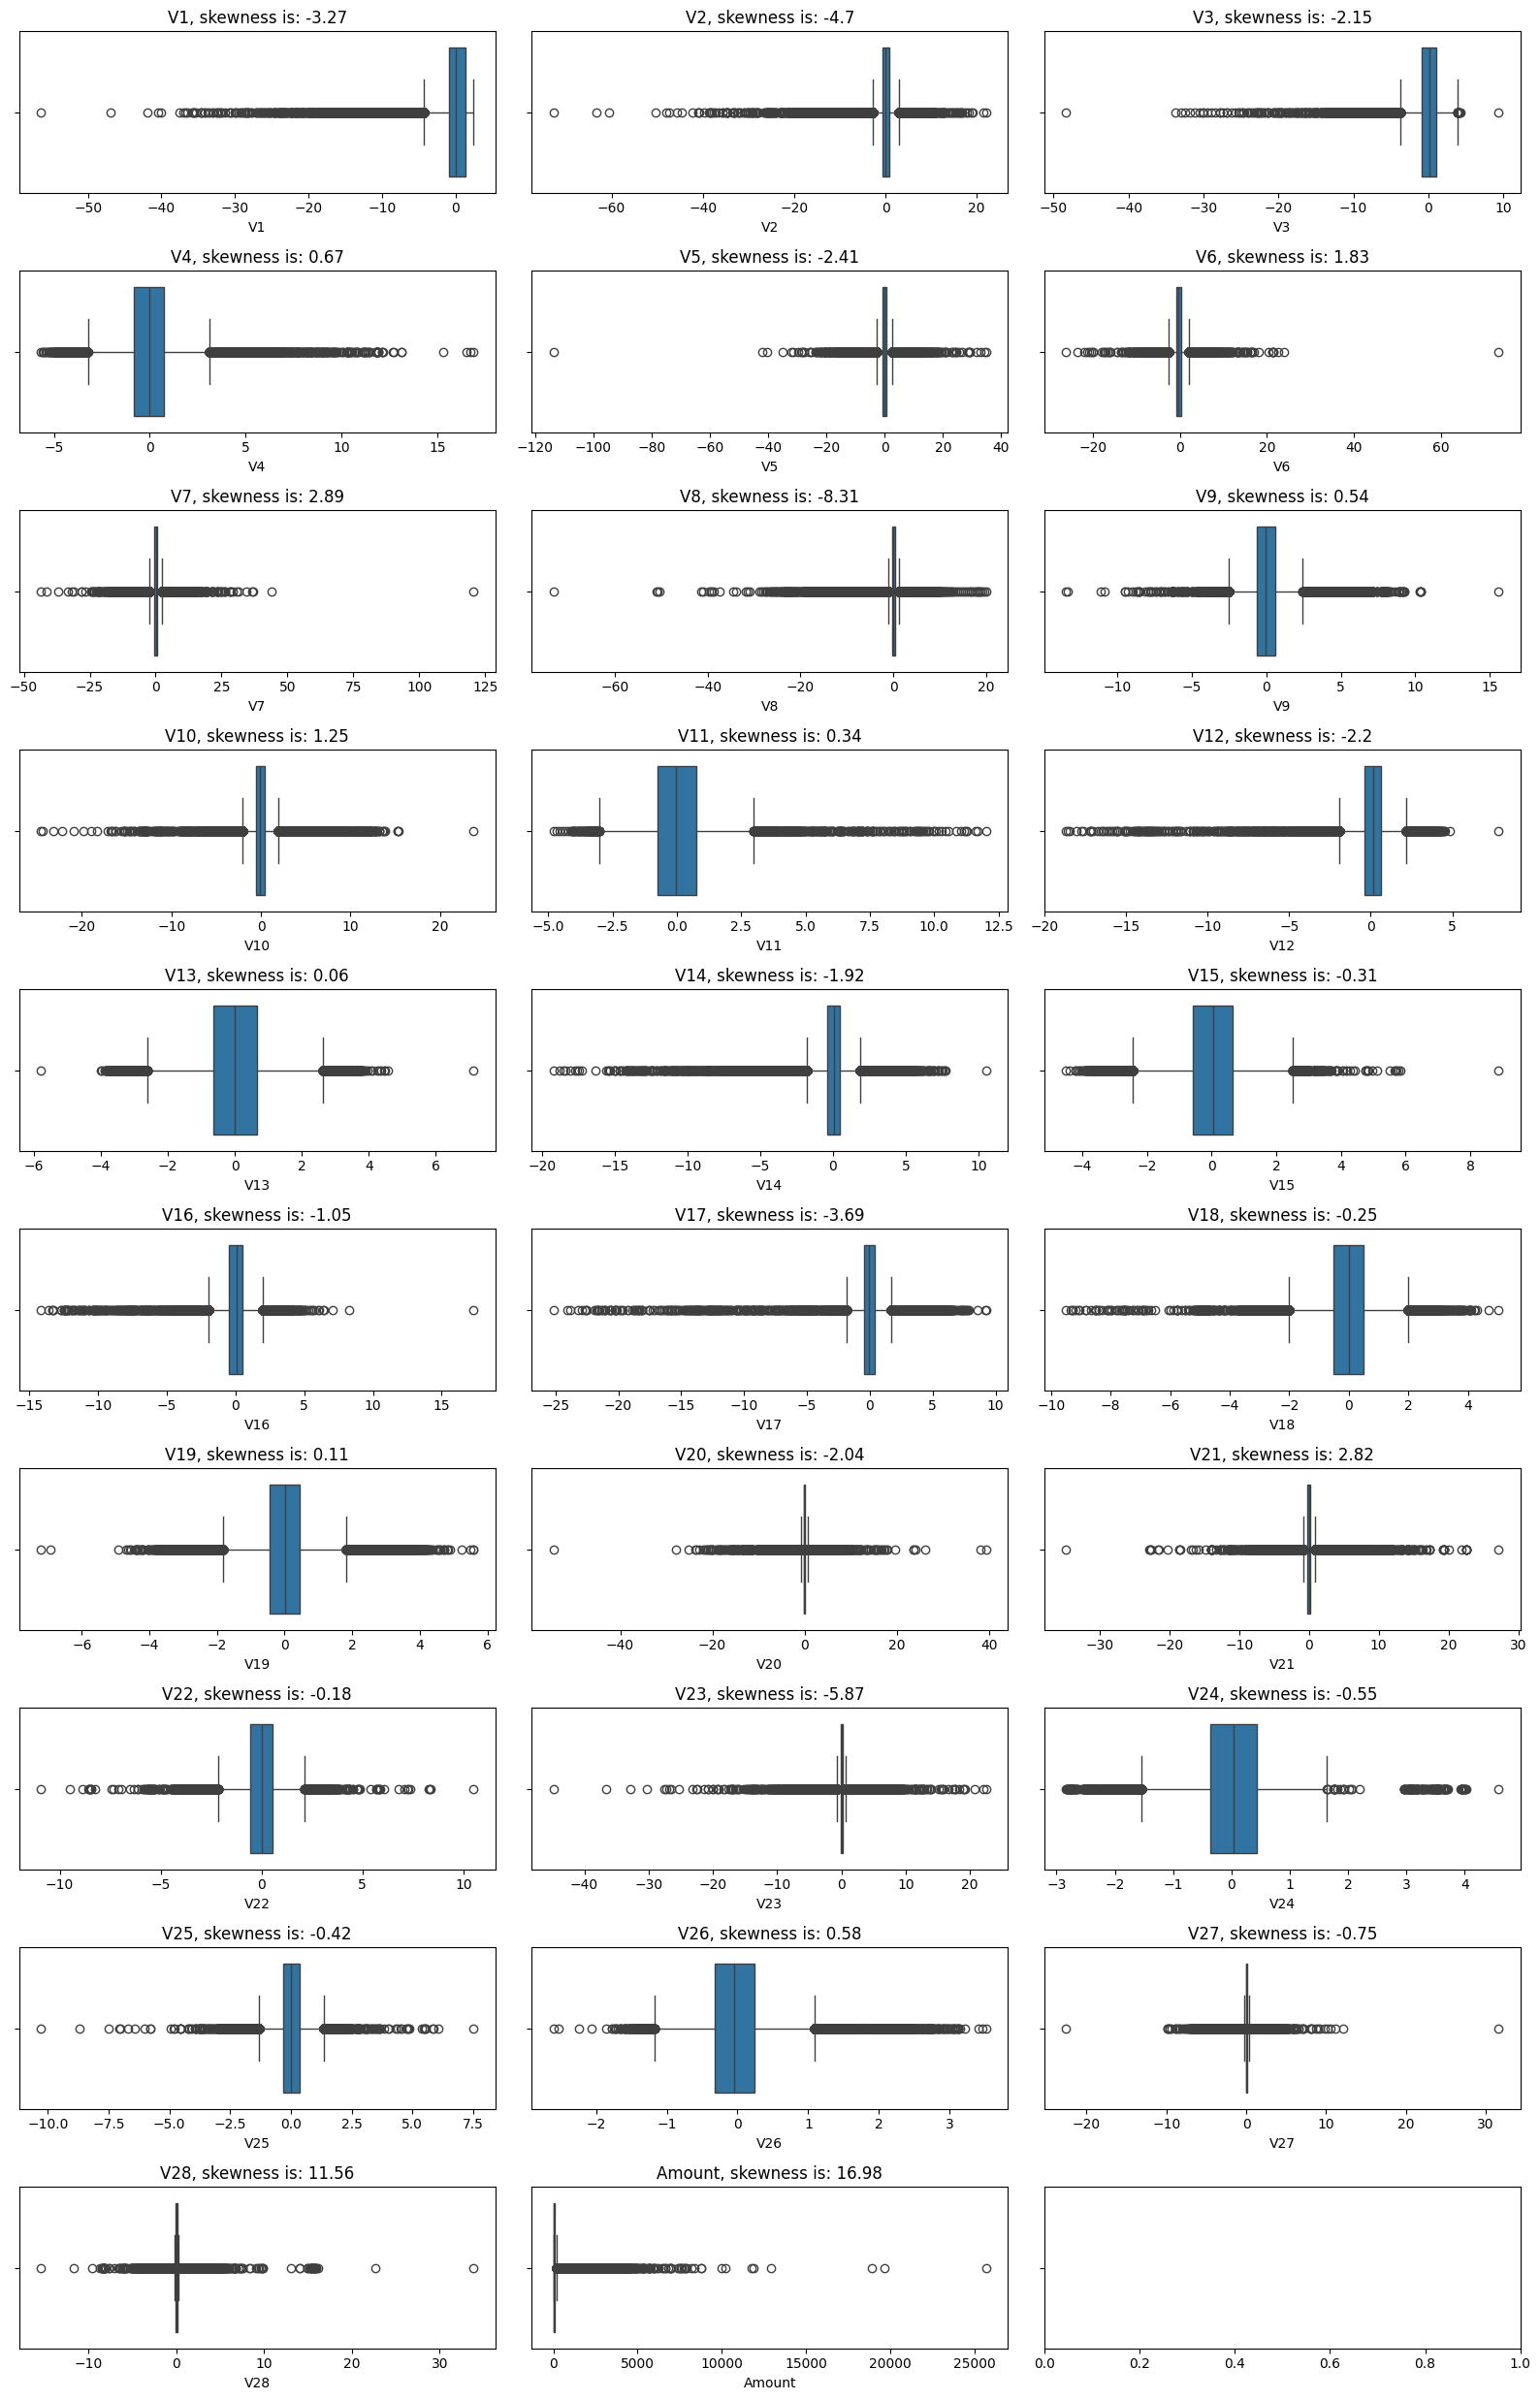

In [13]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='')
plt.tight_layout()

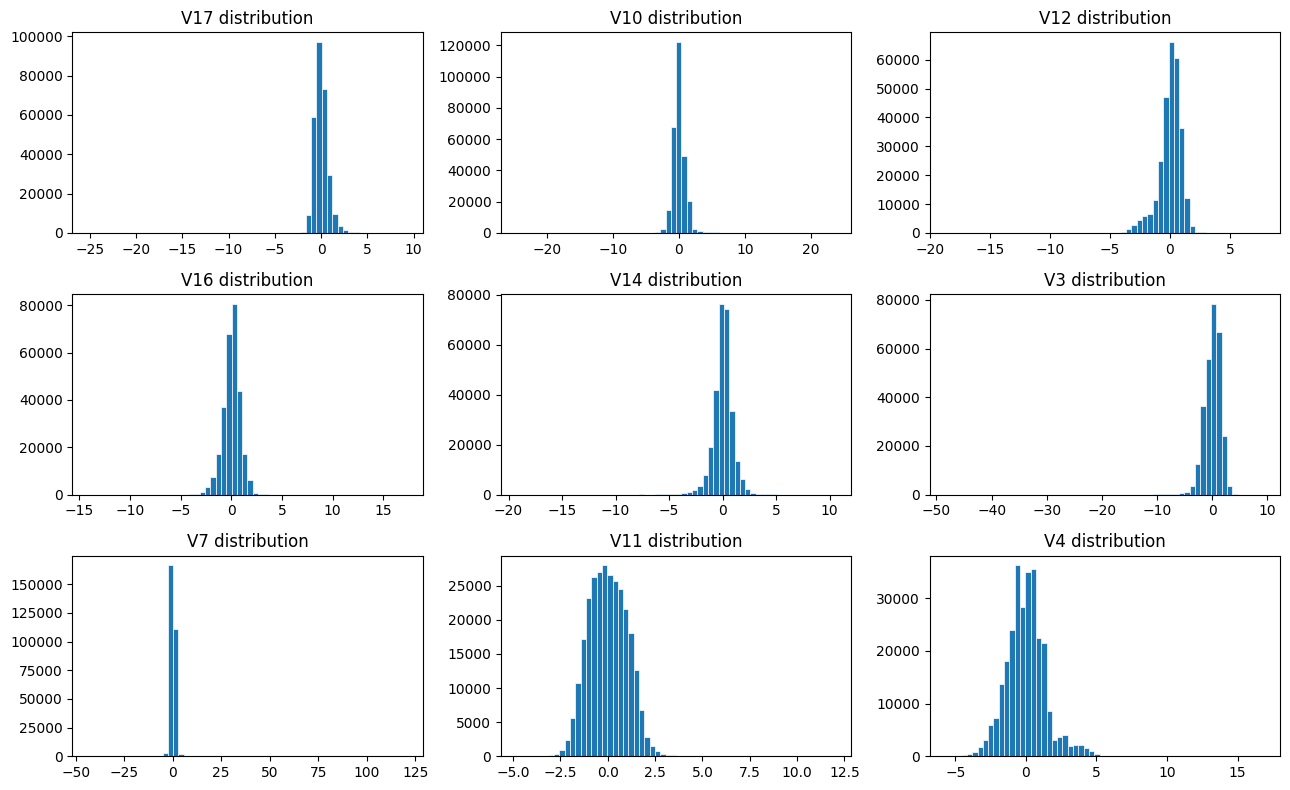

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()


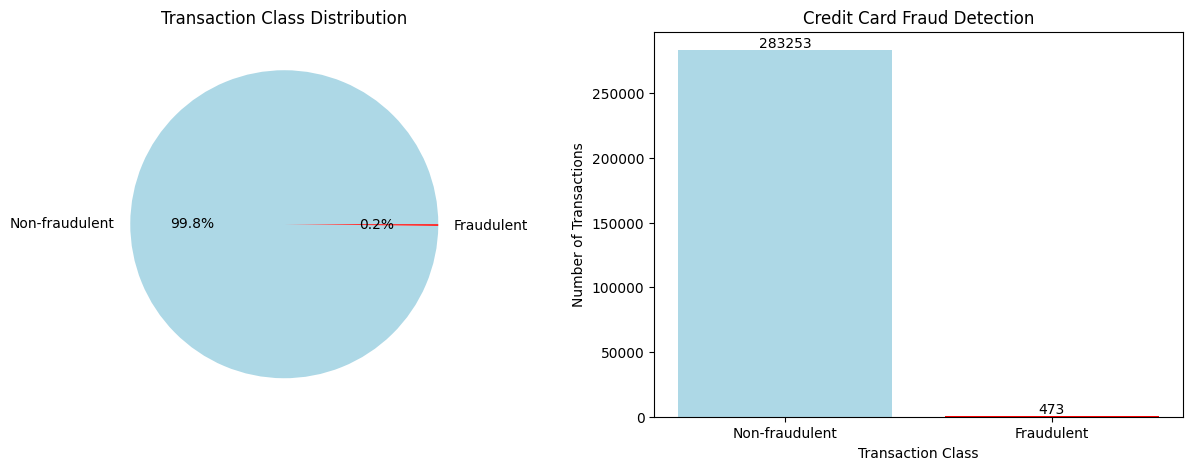

In [15]:
show_graphs(df)

In [16]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal transaction count = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Number of fraudulent transactions = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal transaction count = 283253 (% 99.83328986416473)
Number of fraudulent transactions = 473 (% 0.1667101358352777)


In [17]:
df["Class"].unique()

array([0, 1])

# Feature selection

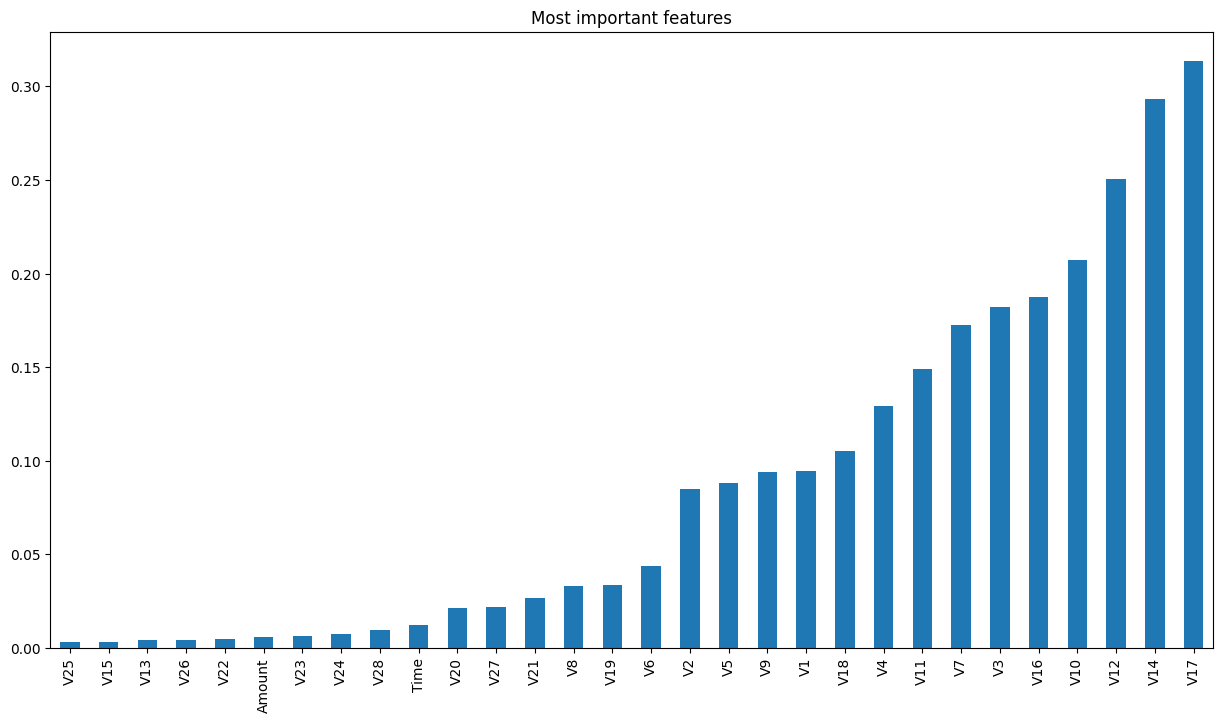

In [18]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [19]:
#selected_features = (df.corr()['Class'][:-1].abs() > 0.15)
selected_features = df.corr()['Class'][:-1].abs().sort_values().tail(14)
df_selected= selected_features.to_frame().reset_index()
selected_featues = df_selected['index']

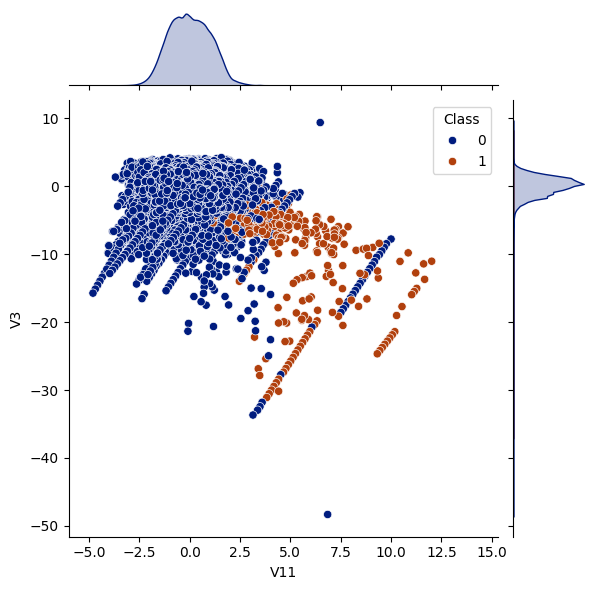

In [20]:
sns.jointplot(x='V11', y='V3',hue='Class', data=df, palette = 'dark')

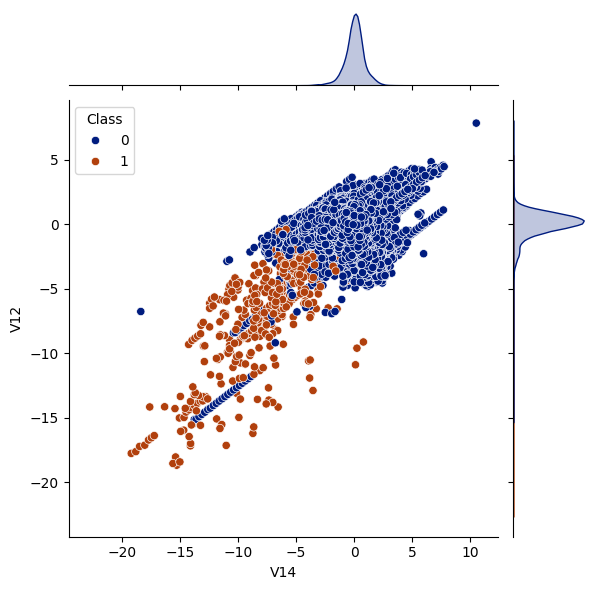

In [21]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

# Splitting the Dataset

## Stratified Splitting

These dataset splits are usually created randomly based on a target variable. However, while doing this, especially when small datasets are involved, the proportion of the target variable may vary between different splits.

With this technique, an equal class percentage is ensured in the training and test parts of the split data.

In [22]:
amount = df['Amount'].values.reshape(-1, 1)

scaler = StandardScaler()
amount_scaled = scaler.fit_transform(amount)

df['Amount'] = amount_scaled

In [23]:
X = df[selected_featues]
y = df['Class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 85)

# Model Creation
## Application of Oversample/Undersample Techniques

At this point, it is necessary to determine the most important factor, which is the technique to be used before the data set is divided. The main purpose of this is to prevent the contamination of the test set's data distribution.

Dividing the data set before applying the oversampling technique may cause the same observations to be present in both the test and training sets. This can lead to the model only learning specific data points, potentially causing overfitting and poor generalization on test data. Data leakage, even if the data is perfectly balanced, can lead to the creation of overly optimistic prediction models.

When data leakage occurs while creating a model using information from outside the training data set, issues may arise.

### Random oversampling

In [25]:
# Oversampling for data augmentation can lead to overfitting.

In [26]:
os.environ['SCIPY_ARRAY_API'] = '1'

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
# X_train_ros, y_train_ros = balance.balancedWithRandomOverSampler(X_train,y_train)
# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)


### Random Undersampling

In [29]:
# Deliberate reduction of data can lead to underfitting.

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus  = rus.fit_resample(X_train,y_train)

# SMOTE

SMOTE (Synthetic Minority Oversampling Technique), for the minority class, increases the number of samples. SMOTE selects the samples close to each other in the feature space, draws a line between the selected samples in the feature space, and creates a new sample at a random point along this line.

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)

# ADASYN

Oversample using Adaptive Synthetic (ADASYN) algorithm.

This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

In [34]:
from imblearn.over_sampling import ADASYN

In [35]:
ada = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train,y_train)

# Model Creation and Training

In [ ]:
#import sys
#sys.path.append('/Users/albertohernandez/Documents/projects/AI-Based-Fraud-Detection/')
#from modelTrainingAndPerformance import mtap

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Define the mtap class
class MTAP:
    def __init__(self):
        self.all_performances = pd.DataFrame(columns=['model_name', 'precision', 'recall', 'f1_score', 'AUC', 'Accuracy'])
        self.all_confusion_matrices = {}

    def model_performance(self, model, X_train, X_test, y_train, y_test, sampling_strategy):
        model_name = f"{model.__class__.__name__}_{sampling_strategy}"
        print(f"***** {model_name} DONE *****")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        self.all_performances.loc[len(self.all_performances)] = {
            'model_name': model_name,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'AUC': auc,
            'Accuracy': accuracy
        }

        cm = confusion_matrix(y_test, y_pred)
        self.all_confusion_matrices[model_name] = cm

    def display_all_confusion_matrices(self, y_true):
        fig, axes = plt.subplots(1, len(self.all_confusion_matrices), figsize=(5 * len(self.all_confusion_matrices), 6))
        if len(self.all_confusion_matrices) == 1:
            axes = [axes] # Make it iterable for a single plot

        for i, (model_name, cm) in enumerate(self.all_confusion_matrices.items()):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
            disp.plot(cmap='viridis', ax=axes[i], values_format='d')
            axes[i].set_title(f"{model_name}\nAccuracy:{self.all_performances.loc[self.all_performances['model_name'] == model_name, 'Accuracy'].iloc[0]:.4f}\nAUC:{self.all_performances.loc[self.all_performances['model_name'] == model_name, 'AUC'].iloc[0]:.4f}")
            axes[i].set_xlabel("Predicted label")
            if i > 0:
                axes[i].set_ylabel("") # Remove y-label for subsequent plots to avoid overlap

        plt.tight_layout()
        plt.show()

# Instantiate the mtap class
mtap = MTAP()

In [51]:
ml_models = [ lgb.LGBMClassifier()] 
             #, AdaBoostClassifier(),GradientBoostingClassifier(),
             #CatBoostClassifier(),XGBClassifier()]
             

***** LGBMClassifier_baseline DONE *****
[LightGBM] [Info] Number of positive: 331, number of negative: 198277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 198608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001667 -> initscore=-6.395302
[LightGBM] [Info] Start training from score -6.395302
***** LGBMClassifier_RandomOverSampler DONE *****
[LightGBM] [Info] Number of positive: 198277, number of negative: 198277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3568
[LightGBM] [Info] 

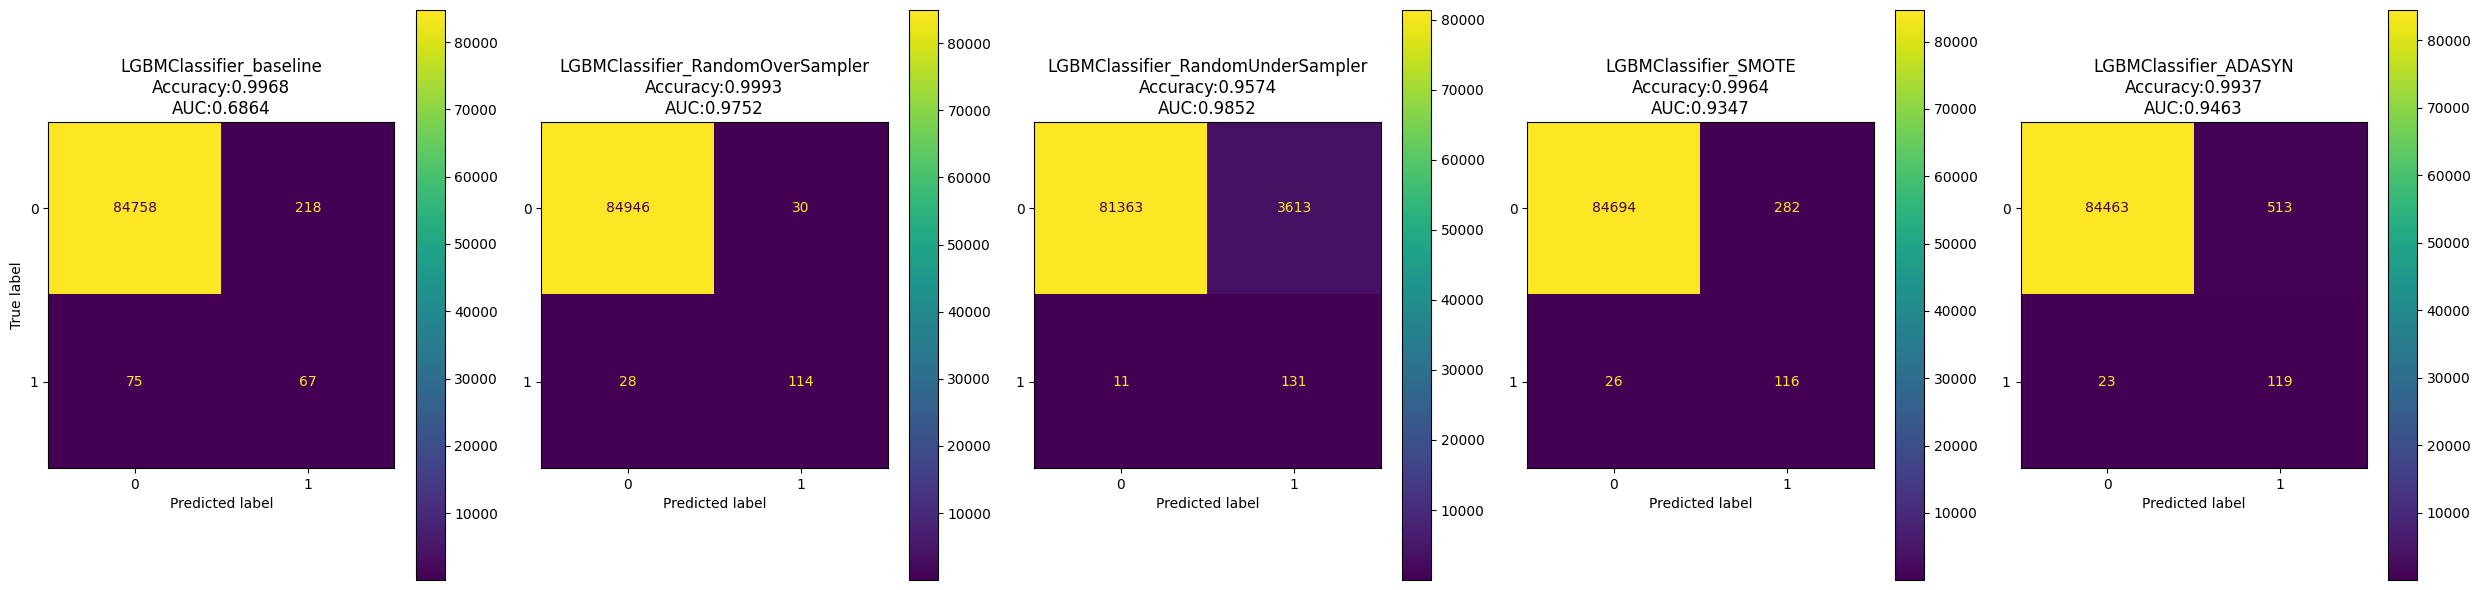

In [53]:
ml_models = [lgb.LGBMClassifier()]
# , AdaBoostClassifier(), GradientBoostingClassifier(),
# CatBoostClassifier(), XGBClassifier()]

for i in ml_models:
    mtap.model_performance(i, X_train, X_test, y_train, y_test, "baseline")
    mtap.model_performance(i, X_train_ros, X_test, y_train_ros, y_test, "RandomOverSampler")
    mtap.model_performance(i, X_train_rus, X_test, y_train_rus, y_test, "RandomUnderSampler")
    mtap.model_performance(i, X_train_smote, X_test, y_train_smote, y_test, "SMOTE")
    mtap.model_performance(i, X_train_adasyn, X_test, y_train_adasyn, y_test, "ADASYN")

print(mtap.all_performances.sort_values(by=['f1_score'], ascending=False))
print(mtap.all_performances.sort_values(by=['f1_score', 'AUC'], ascending=False))
mtap.display_all_confusion_matrices(y_test)

In [54]:
print("\n")
print("Performance sorted by f1_score:")
print(mtap.all_performances.sort_values(by=['f1_score'], ascending=False))
print("\nPerformance sorted by f1_score and AUC:")
print(mtap.all_performances.sort_values(by=['f1_score','AUC'], ascending=False))



Performance sorted by f1_score:
                          model_name  precision    recall  f1_score       AUC  \
1   LGBMClassifier_RandomOverSampler   0.791667  0.802817  0.797203  0.975195   
6   LGBMClassifier_RandomOverSampler   0.791667  0.802817  0.797203  0.975195   
3               LGBMClassifier_SMOTE   0.291457  0.816901  0.429630  0.934719   
8               LGBMClassifier_SMOTE   0.291457  0.816901  0.429630  0.934719   
0            LGBMClassifier_baseline   0.267148  0.521127  0.353222  0.686448   
5            LGBMClassifier_baseline   0.235088  0.471831  0.313817  0.630902   
4              LGBMClassifier_ADASYN   0.188291  0.838028  0.307494  0.946348   
9              LGBMClassifier_ADASYN   0.188291  0.838028  0.307494  0.946348   
2  LGBMClassifier_RandomUnderSampler   0.034989  0.922535  0.067422  0.985196   
7  LGBMClassifier_RandomUnderSampler   0.034989  0.922535  0.067422  0.985196   

   Accuracy  
1  0.999319  
6  0.999319  
3  0.996381  
8  0.996381  
0  0

# Deep learning

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics=[Precision(), Recall()]

2025-06-27 15:03:33.064437: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-27 15:03:33.064642: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-06-27 15:03:33.064656: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1751058213.065219 2042181 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751058213.065266 2042181 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [46]:
def y_pred_for_DLModels(model, X_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).flatten()
    return y_pred_binary

In [ ]:
X_train_scaled, X_test_scaled = preprocessing(df)